# Drug Classification Using KNN

## Data Source
Dataset Link: [Drug Classification](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)

The **Drug Classification** dataset is a collection of data used to determine the type of drug that is appropriate for a patient based on their health characteristics. This dataset consists of features such as age, gender, blood pressure, cholesterol level, and sodium to potassium ratio. This dataset is designed for classification tasks and is particularly useful in medical analysis or the development of machine learning models for personalized medicine.

## Project Scope

### Objectives

1. **Build a Drug Prediction Model**  
Develop a machine learning model to predict the type of medication that is appropriate for patients based on their individual characteristics (such as age, blood pressure, and cholesterol level).
2. **Analyze Patient Data**  
Understand the relationship patterns between patient attributes (age, blood pressure, cholesterol, etc.) and the type of medication recommended.
3. **Drug Administration Optimization**  
Help medical professionals determine the most suitable drug type based on the patient profile to improve treatment effectiveness.

### Problems to be Solved

1. **Personalized Medicine**  
How to determine the optimal drug type based on the patient's individual characteristics? Are there any influencing factors in the determination?
2. **Diagnosis Efficiency**  
Can machine learning models simplify diagnosis and drug recommendations so that manual processes can be minimized?
3. **Data Clustering and Patterns**
Are there certain significant patterns in the data that link variables such as blood pressure or cholesterol to specific drug preferences?
4. **Accurate Classification**  
How to ensure proper classification of drug types based on patient attributes to minimize recommendation errors?


## Import Library

In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

### Load Dataset

In [542]:
df = pd.read_csv('./datasets/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**Dataset Description**

| **Feature** | **Description** |
|--------------------------|---------------------------------------------------------------------------------------------|
| `Age` | Patient age in years                                                                   |
| `Sex` | The gender of the patient (`Male` or `Female`)                                               |
| `BP` | The patient's blood pressure level (`High`, `Normal`, or `Low`)                               |
| `Cholesterol` | The patient's cholesterol level (`High` or `Normal`)                                          |
| `Na_to_K` | The ratio between sodium (Na) and potassium (K) levels in the patient's body                         |
| `Drug` | The type of drug recommended for the patient                                              |


### Data Assessing

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Implications for Analysis**

The dataset's structure and characteristics provide several advantages and considerations for analysis and machine learning model development:

1. **Clean Data with No Missing Values**:
   - All columns have 200 non-null entries, ensuring no data imputation or missing value handling is required. This simplifies the preprocessing stage, allowing analysts to focus directly on feature engineering and model building.

2. **Categorical Columns**:
   - The categorical features (`Sex`, `BP`, `Cholesterol`, and `Drug`) represent patient characteristics and the target variable.
   - These features will require encoding (e.g., one-hot encoding or label encoding) to be processed by machine learning models.

3. **Numerical Columns**:
   - The numerical features, `Age` and `Na_to_K`, are ready for analysis but might benefit from scaling or normalization to ensure consistent value ranges.

4. **Small Dataset Size**:
   - With only 200 entries, the dataset is relatively small, enabling quick exploratory data analysis (EDA) and model training without requiring significant computational resources.


In [544]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


**Key Insights from Descriptive Statistics**

1. **`Age` (Patient Age):**
   - Age ranges from **15** to **74 years**, with an average of **44 years**.
   - The distribution is relatively even, with 50% of patients under **45 years**.
   - Standard deviation is **16.54**, indicating moderate variability in the ages of patients.

2. **`Na_to_K` (Sodium to Potassium Ratio):**
   - Ratio values range from **6.27** to **38.25**, with an average of **16.08**.
   - Most patients (75%) have values below **19.38**, suggesting that lower ratios are more common.

3. **`Sex` (Gender):**
   - The dataset includes both genders with a slight majority of males (`Male`, **104 patients**) compared to females (`Female`, **96 patients**).

4. **`BP` (Blood Pressure Levels):**
   - There are three categories of blood pressure, with **High** being the most frequent (**77 patients**).

5. **`Cholesterol` (Cholesterol Levels):**
   - Cholesterol is categorized into two levels, with **High** being the most common (**103 patients**).

6. **`Drug` (Target Variable - Drug Type):**
   - There are five types of drugs, with **DrugY** being the most recommended drug (**91 patients**).


In [545]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

The dataset is complete, with no missing values in any column.

In [546]:
print('Duplicated Data:', df.duplicated().sum())

Duplicated Data: 0


The dataset also does not have the same row or duplication.

In [547]:
print('Unique Values in Any Column')
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {len(unique_values)}")

Unique Values in Any Column
Age: 57
Sex: 2
BP: 3
Cholesterol: 2
Na_to_K: 198
Drug: 5


## Exploratory Data Analysis (EDA)

### Univariate Analysis

Age

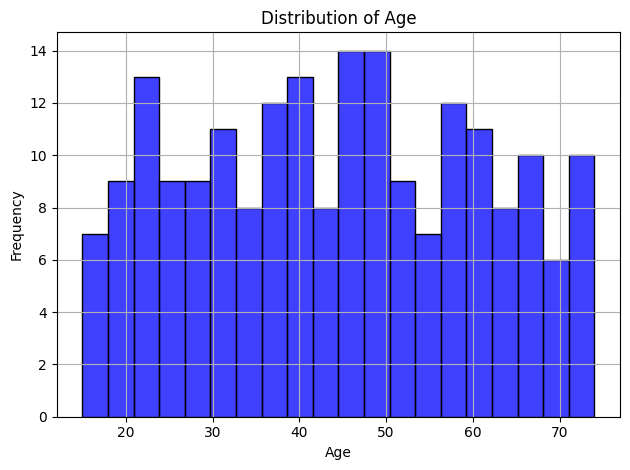

In [548]:
sns.histplot(x='Age', data=df, bins=20, kde=False, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

The age distribution is relatively uniform and balanced distribution across different age groups. The dataset captures a wide variety of age groups, making it suitable for generalizable analysis. The age groups around **50 years old** appear to be the most frequent. The representation of both younger and older patients allows for the exploration of potential patterns or trends in drug recommendations across different age groups.

Sex

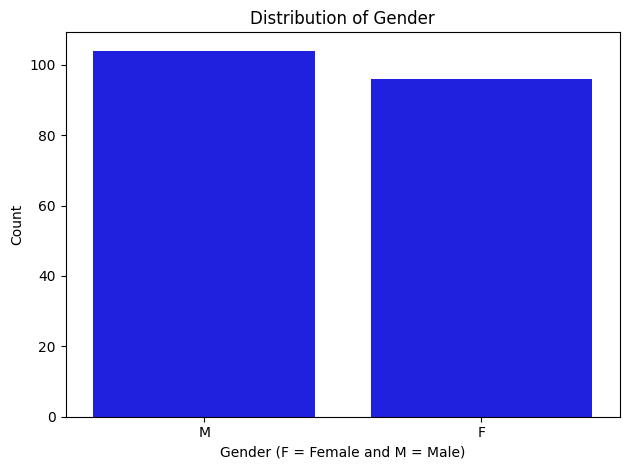

In [549]:
sns.countplot(x='Sex', data=df, order=df['Sex'].value_counts().index, color='blue')
plt.title('Distribution of Gender')
plt.xlabel('Gender (F = Female and M = Male)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The diagram above represents a nearly balanced distribution of genders, with a slightly higher proportion of **male** patients. This balance ensures that gender-based analyses and predictions are unbiased and generalizable across both male and female populations.

BP (Blood Pressure)

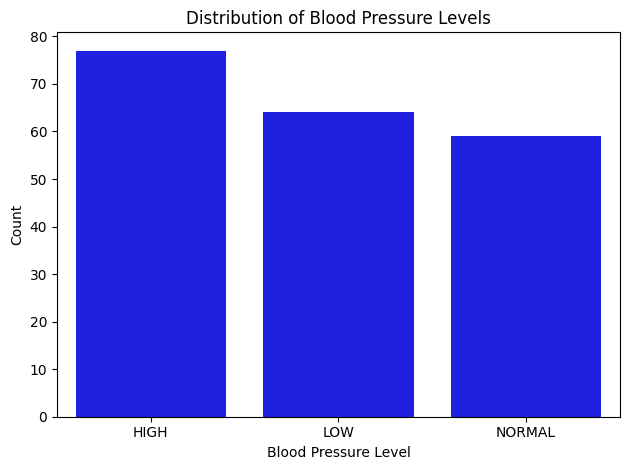

In [550]:
sns.countplot(x='BP', data=df, order=df['BP'].value_counts().index, color='blue')
plt.title('Distribution of Blood Pressure Levels')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The majority of patients in the dataset have **high blood pressure**, followed by those with **low blood pressure**. **Normal blood pressure** almost has the same value as the previous 2 values, which could be relevant for analyzing drug recommendations and health trends related to hypertension. This distribution suggests that high blood pressure might be a common health condition in the study's population.

Cholesterol

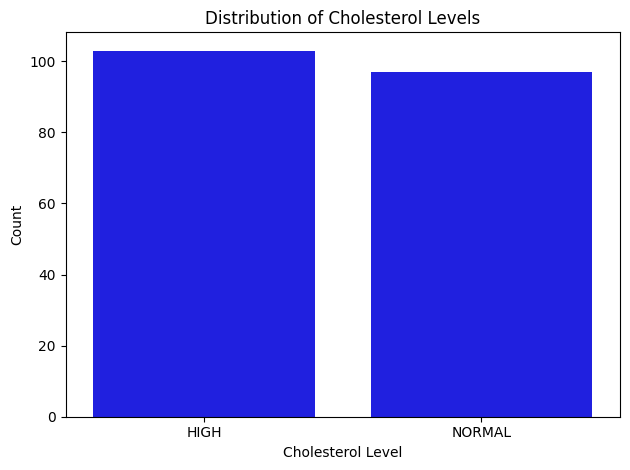

In [551]:
sns.countplot(x='Cholesterol', data=df, order=df['Cholesterol'].value_counts().index, color='blue')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The diagram indicates a higher prevalence of patients with **high cholesterol**, which may be important for analyzing medication prescriptions or identifying patterns related to cholesterol management. The relatively balanced distribution between **high** and **normal** cholesterol levels makes the dataset suitable for exploring potential correlations between cholesterol and drug recommendations.

Na_to_K

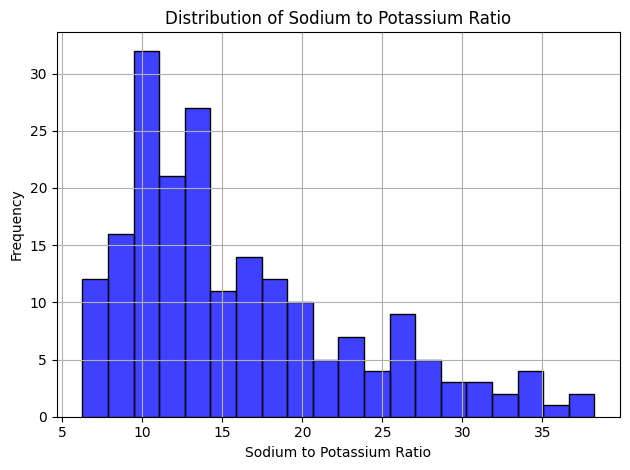

In [552]:
sns.histplot(x='Na_to_K', data=df, bins=20, kde=False, color='blue')
plt.title('Distribution of Sodium to Potassium Ratio')
plt.xlabel('Sodium to Potassium Ratio')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

The diagram shows that most patients have a lower sodium to potassium ratio, with the majority of values concentrated below **19.38**. This distribution may suggest a focus on maintaining balanced sodium and potassium levels in the study's population and further analysis could help identify any correlations with drug prescriptions or other health conditions.

Drug

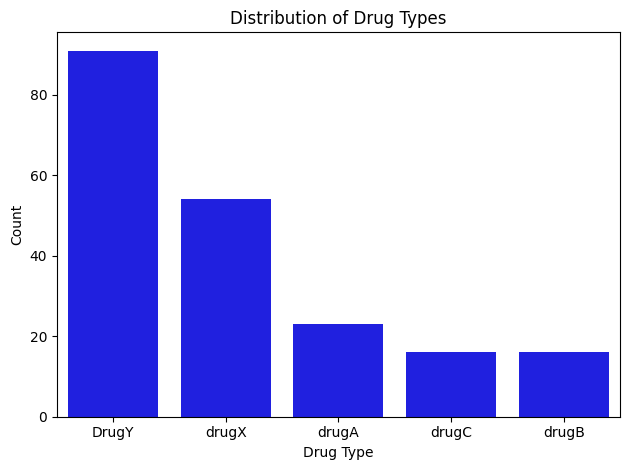

In [553]:
sns.countplot(x='Drug', data=df, order=df['Drug'].value_counts().index, color='blue')
plt.title('Distribution of Drug Types')
plt.xlabel('Drug Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The dataset is dominated by **DrugY**, which could indicate its high efficacy, popularity, or preference among healthcare providers. Other drug types, such as **DrugX**, **DrugA**, **DrugC**, and **DrugB**, are less common, with **DrugY** being significantly more prevalent. The distribution shows that while other drugs are used, **DrugY** is the most prevalent, which may provide insights into treatment trends and drug effectiveness.

### Bivariate Analysis

Age vs Drug Type

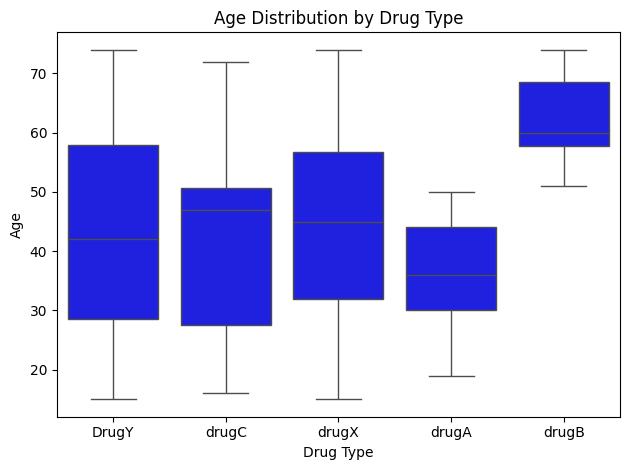

In [554]:
sns.boxplot(x='Drug', y='Age', data=df, color='blue')
plt.title('Age Distribution by Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

Based on the graph above, patients using **DrugY**, **DrugC**, **DrugX**, and **DrugA** have an age range of around 30 - 60 years. The interesting part is that **DrugB** was used by patients with a range of 60 - 70 years. This makes **DrugB** seem to be specialized only by people who have an advanced age. These findings suggest that drug usage patterns vary significantly with age, influenced by factors such as lifestyle, health, and socio-economic conditions, emphasizing the need for targeted, age-specific health interventions and prevention strategies.

Sex vs Drug Type

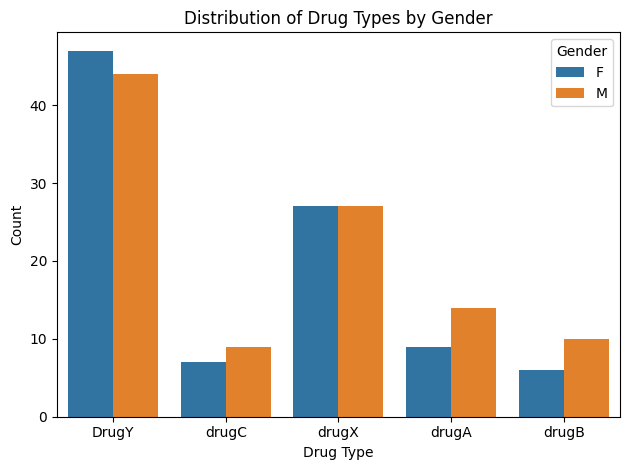

In [555]:
sns.countplot(x='Drug', hue='Sex', data=df, palette='tab10')
plt.title('Distribution of Drug Types by Gender')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')

plt.tight_layout()
plt.show()

The graph can observe clear differences in drug usage between males and females for various drug types. For instance, **DrugA** has a significantly higher usage among males compared to females. This suggests that **DrugA** is predominantly used by males in the dataset. On the other hand, **DrugX** shows a more balanced distribution, with similar bar heights for both sexes, indicating that both males and females use this drug type at almost equal rates. Conversely, **DrugC**, **DrugA**, and **DrugB** appears to be more common among females, implying a higher prevalence or association of this drug with females. These patterns highlight gender-specific trends in drug usage, where certain drugs are more likely to be used by one sex over the other, suggesting potential underlying factors such as social, cultural, or behavioral influences that could be further explored to inform gender-targeted interventions in public health programs.

BP (Blood Pressure) vs Drug Type

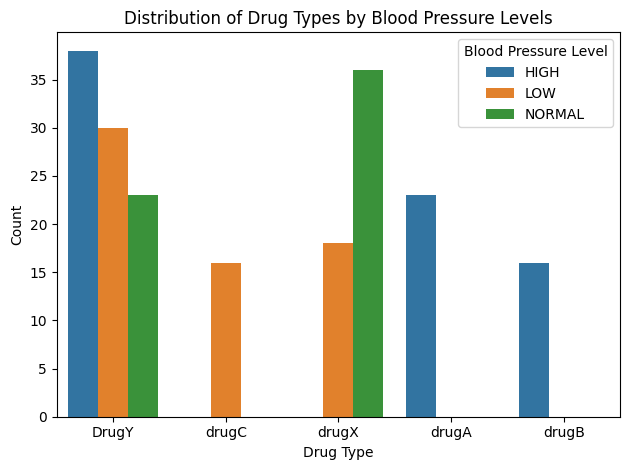

In [556]:
# graph with bivariate analysis between bp (blood pressure) vs drug type
sns.countplot(x='Drug', hue='BP', data=df, palette='tab10')
plt.title('Distribution of Drug Types by Blood Pressure Levels')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.legend(title='Blood Pressure Level', loc='upper right')

plt.tight_layout()
plt.show()

Based on the graph above, **DrugY** has a variety of blood pressure levels that include 3 types starting from the most, namely high, low, and normal. Likewise, **DrugX** has 2 variations of blood pressure levels, starting from the most, namely normal and low. Meanwhile, other types of drugs, such as **DrugC** only have a low blood pressure level variation, **DrugA** and **DrugB** have a high blood pressure level variation only. The data highlights a clear relationship between BP levels and drug usage, with certain drugs being more prevalent in individuals with specific BP conditions, underlining the need for targeted treatments and interventions based on blood pressure status.

Cholesterol vs Drug Type

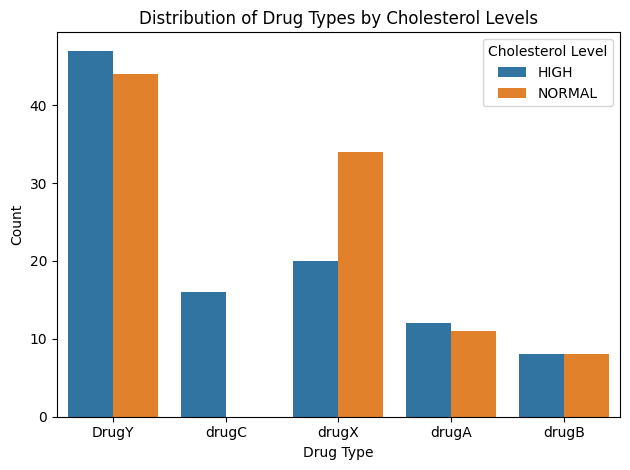

In [557]:
sns.countplot(x='Drug', hue='Cholesterol', data=df, palette='tab10')
plt.title('Distribution of Drug Types by Cholesterol Levels')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.legend(title='Cholesterol Level', loc='upper right')

plt.tight_layout()
plt.show()

In the graph, **DrugY** and **DrugA** have a predominance of high cholesterol levels that are more than normal. Meanwhile, **DrugX** has the opposite dominance to the previous 2 drugs, with more normal cholesterol levels than high. **DrugB** only appeared to be balanced across the 2 cholesterol levels. The interesting part is **DrugC** which only has 1 cholesterol level, which is high. These trends indicate that cholesterol levels strongly influence the type of drug used, emphasizing the importance of considering cholesterol status when prescribing treatments or planning interventions related to cardiovascular health.

Na_to_K vs Drug Type

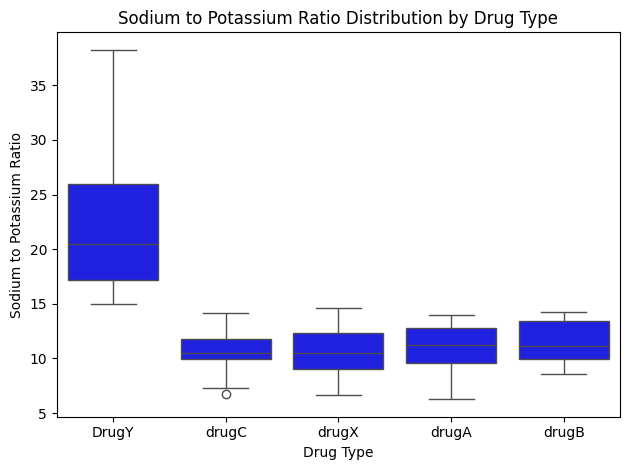

In [558]:
# graph with bivariate analysis between Na_to_K vs Drug Type
sns.boxplot(x='Drug', y='Na_to_K', data=df, color='blue')
plt.title('Sodium to Potassium Ratio Distribution by Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('Sodium to Potassium Ratio')

plt.tight_layout()
plt.show()

Based on the graph above, **DrugC** has outliers in the dataset. In addition, **DrugC**, **DrugX**, **DrugA**, and **DrugB** have the same and low range of values in each drug. Meanwhile, **DrugY** has a range of values that is quite high and different from other drugs. This difference in the range of values for **DrugY** reflects its greater versatility or popularity compared to the other drugs in the dataset.

## Data Preparation

In [559]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

The **LabelEncoder** selected for `Sex`, `BP`, `Cholesterol`, and `Drug` features will convert each category in the feature into a number. In addition, the Label Encoder will also retain the order information of each feature in numerical representation.

In [560]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

The use of **StandardScaler** was chosen after conducting experiments during the training process, which showed that the results were better than the use of **MinMaxScaler**

In [561]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,-1.040833,-1.110169,-0.970437,1.286522,0
1,0.162699,0.960769,0.109797,-0.970437,-0.415145,3
2,0.162699,0.960769,0.109797,-0.970437,-0.828558,3
3,-0.988614,-1.040833,1.329763,-0.970437,-1.149963,4
4,1.011034,-1.040833,0.109797,-0.970437,0.271794,0


Correlation Between Features

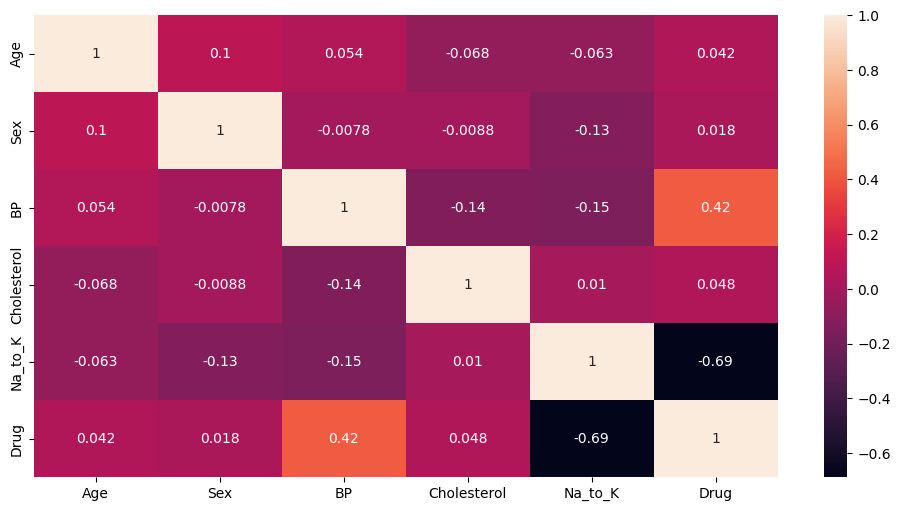

In [562]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

These correlations can help the model to understand the variations in the data better. The correlation between `BP` and `Drug` has the highest positive correlation indicating a linear relationship between the 2 features. On the other hand, the correlation between `Na_to_K` and `Drug` has the highest negative correlation indicating an inverse relationship.

In [563]:
X = df.drop(columns = ['Drug'], axis=1)
y = df['Drug']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (200, 5)
Shape of y: (200,)


In [564]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (160, 5)
Shape of y_train: (160,)
Shape of X_test: (40, 5)
Shape of y_test: (40,)


## Modeling

In [565]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}


The results of finding the best hyperparameters show that the K-Nearest Neighbors (KNN) model works best by using the n_neighbors parameter of `7` and weights with a value of `distance`. This higher value of `n_neighbors` indicates that the model is better at making predictions by considering more nearest neighbors. In addition, the use of `weights` with a value of `distance` means that the model gives more weight to closer neighbors, so that predictions are more influenced by data points that are more relevant and close to the predicted point.

In [566]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], weights=grid_search.best_params_['weights'])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

## Model Evaluation

In [567]:
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(knn_accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy: 95.00%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       0.91      0.91      0.91        11

    accuracy                           0.95        40
   macro avg       0.97      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



The following is the interpretation of the evaluation results:
- **Accuracy**: The model accuracy of 95% indicates that most of the predictions were correct. Only about 5% of the overall data was classified incorrectly in determining the medication given to the patient.
- **Precision**: High precision indicates that the model tends to predict correctly, especially in classes 1, 2, and 3 which have a precision of 1.00. The precision for classes 0 and 4 were 0.94 and 0.91, respectively. Although the precision is slightly lower, it still shows that where each class is classified it actually matches the class and data owned by the patient.
- **Recall**: The excellent recall in classes 0, 1, and 2 shows that the model was able to find almost all positive cases in those classes. In classes 3 and 4, the recall is slightly lower indicating that the model may have missed some positive cases in these classes.
- **F1-Score**: F1-score close to 1 for most classes indicates a good balance between precision and recall. 

## Predict

In [568]:
testing = {
    'Age': [37],
    'Sex': [0],
    'BP': [1],
    'Cholesterol': [0],
    'Na_to_K': [33.1]
}

testing_df = pd.DataFrame(testing)
testing_df

,Age,Sex,BP,Cholesterol,Na_to_K
0,37,0,1,0,33.1


In [569]:
prediction = knn.predict(testing_df)
print('Predicted Drug Type:', le.inverse_transform(prediction)[0])

Predicted Drug Type: DrugY


## Conclusion

The K-Nearest Neighbors (KNN) model developed for drug classification on the *Drug Classification* dataset demonstrates exceptional performance with an accuracy rate of **95%**. Below are the key conclusions derived from this project:

1. **Model Effectiveness**  
   The high accuracy indicates that the model effectively provides accurate predictions for the majority of the data, making it a reliable solution for assisting drug recommendation processes based on patient characteristics.

2. **Use of Optimal Parameters**  
   The choice of optimal parameters (`n_neighbors = 7` and `weights = distance`) enhances the model’s ability to deliver relevant predictions. Considering more neighbors and weighting based on distance positively influenced the model's accuracy.

3. **Reliability Across Drug Classes**  
   - **Precision**: The high precision (up to 1.00 for some classes) shows that the model rarely misclassifies drug types, especially for drug classes with distinctive patient characteristics.
   - **Recall**: Strong recall in most classes demonstrates the model's capability to identify positive cases effectively. However, slight reductions in recall for classes 3 and 4 indicate room for improving the model's sensitivity in those areas.

4. **Prediction Balance**  
   The F1-scores, which are close to 1 for most classes indicate a good balance between precision and recall. This means the model minimizes errors while recognizing variations within the data effectively.

5. **Clinical Benefits**  
   The model contributes significantly to personalized medicine by helping medical professionals make data-driven decisions more quickly and accurately. By reducing reliance on manual processes, it enhances efficiency in diagnosing and recommending medications.
